In [73]:
%load_ext watermark
%watermark -v -n -m -p numpy,scipy,sklearn,pandas

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Wed Aug 21 2019 

CPython 3.6.8
IPython 7.6.0

numpy 1.16.4
scipy 1.2.1
sklearn 0.21.2
pandas 0.24.2

compiler   : GCC 7.3.0
system     : Linux
release    : 4.15.0-58-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import nolds
import sys
import data
import mne

from config import *
from data.utils import get_meta_df, get_metapkl
from data.data_files import files_builder, DataKind

meta_df = get_meta_df()
metapkl = get_metapkl()
data = np.transpose(files_builder(DataKind('processed')).single_file('1a.fif').values)

Opening raw data file /home/miroslav/Source/thesis_project/data/processed/1a.fif...
This filename (/home/miroslav/Source/thesis_project/data/processed/1a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 19104 =      0.000 ...    76.416 secs
Ready.


/home/miroslav/Source/thesis_project/src/data/utils.py:18: RuntimeWarning: This filename (/home/miroslav/Source/thesis_project/data/processed/1a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


AttributeError: 'File' object has no attribute 'values'

/home/miroslav/anaconda3/envs/thesis/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: read_table is deprecated, use read_csv instead.
  import sys


Creating RawArray with float64 data, n_channels=19, n_times=19105
    Range : 0 ... 19104 =      0.000 ...    76.416 secs
Ready.
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...


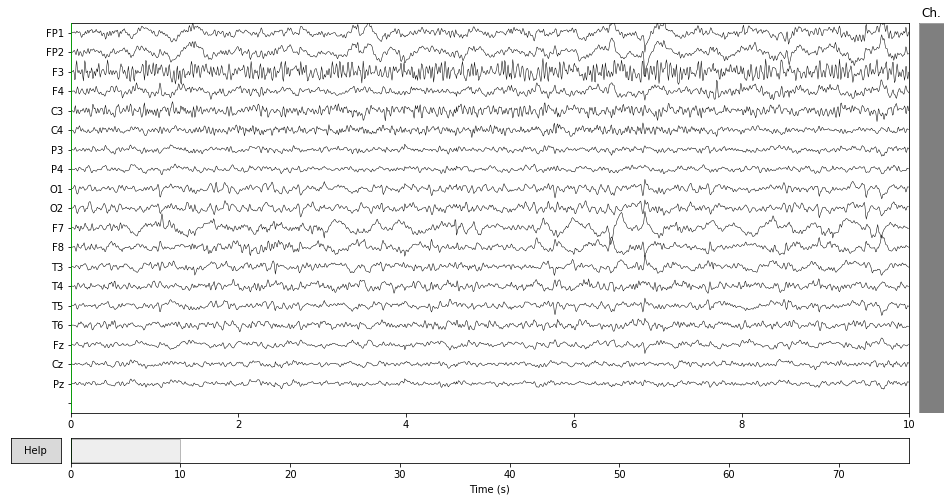

/home/miroslav/anaconda3/envs/thesis/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


In [75]:
import mne
names = ['FP1', 'FP2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 
         'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']

raw_root = os.path.abspath(os.path.join(DATA_ROOT, 'raw'))
filename = '1a.tdt'
df = pd.read_table(os.path.join(raw_root, filename), sep='\t', names=names, skiprows=[0])

info = mne.create_info(ch_names=names, sfreq=250, ch_types='eeg')
data = mne.io.RawArray(np.transpose(df.values), info)

data.set_eeg_reference('average', projection=True)  # set EEG average reference
data.apply_proj()
fig = data.plot(block=True, lowpass=40, scalings='auto', show_options=False)
# fig.set_size_inches(1, forward=True)
fig.show()

In [76]:
def f(row, col):
    if row[col] <= 16:
        return -1
    if row[col] <= 28:
        return 0
    else:
        return 1
def ff(row, col, n=5):
    for i in range(n):
        if row[col] <= metapkl.quantile((i+1)/n)[col]:
            return i
    
metapkl['dep'] = metapkl.apply(lambda row: f(row, 'sc'), axis=1)
metapkl['dep_bef'] = metapkl.apply(lambda row: f(row, 'sc_bef'), axis=1)
metapkl['dep_aft'] = metapkl.apply(lambda row: f(row, 'sc_aft'), axis=1)
metapkl = metapkl.astype({'dep': 'category', 'dep_bef': 'category', 'dep_aft': 'category'})                                           
print(metapkl['dep'].value_counts())
print(metapkl['dep_bef'].value_counts())
print(metapkl['dep_aft'].value_counts())

def f(row, col):
    if row[col] <= metapkl.loc[(slice(None), 'a'), :].quantile(0.42)['change']:
        return -1
    if row[col] <= metapkl.loc[(slice(None), 'a'), :].quantile(0.56)['change']:
        return 0
    else:
        return 1
    
metapkl['resp'] = metapkl.apply(lambda row: f(row, 'change'), axis=1)
metapkl = metapkl.astype({'resp': 'category'})                                           
print(metapkl.loc[(slice(None), 'a'), 'resp'].value_counts())

 0    148
-1     62
 1     56
Name: dep, dtype: int64
0    170
1     96
Name: dep_bef, dtype: int64
 0    126
-1    124
 1     16
Name: dep_aft, dtype: int64
 1    59
-1    57
 0    17
Name: resp, dtype: int64


In [77]:
meta_df

,freq,RESP_4W,RESP_FIN,REMISE_FIN,AGE,SEX,M_1,M_4,M_F,délka léčby,lék 1,lék 2,lék 3,lék 4
ID,,,,,,,,,,,,,,
1,250,1,1,0,49,0,26,13,13,4,milnacipram,NaN,NaN,NaN
2,250,0,0,0,36,0,31,30,30,4,bupropion,NaN,NaN,NaN
3,250,1,1,1,48,0,25,7,7,5,sertralin,trazodon,NaN,NaN
4,250,0,0,0,55,0,26,25,25,4,rTMS,clonazepam,NaN,NaN
5,250,0,0,0,35,0,26,37,37,4,rTMS,mirtazapin,cilalopram,chlorprothixen
6,250,0,0,0,37,0,31,17,26,6,escitalopram,NaN,NaN,NaN
7,250,0,0,0,63,0,30,25,25,4,rTMS,mirtazapin,quetiapin,escitalopram
8,250,1,1,1,50,1,24,11,11,4,rTMS,dosulepin,esctitalopram,NaN
9,250,0,0,0,59,1,34,27,27,4,rTMS,milnacipran,NaN,NaN


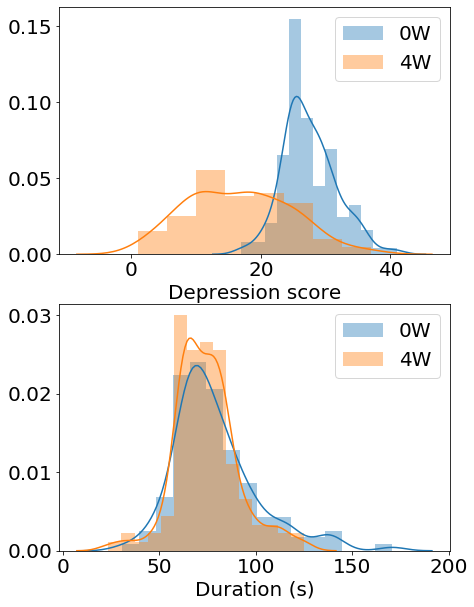

In [78]:
fig, ax = plt.subplots(2, 1, figsize=(7,10), sharex=False, sharey=False)
sns.distplot(meta_df['M_1'], ax=ax[0], label='0W')
sns.distplot(meta_df['M_4'], ax=ax[0], label='4W')
ax[0].set_xlabel('Depression score', fontsize=20)
ax[0].legend(fontsize=20)
ax[0].tick_params(axis='x', labelsize=20)
ax[0].tick_params(axis='y', labelsize=20)

durs = pd.read_pickle(os.path.join(DATA_ROOT, 'durations', 'durations.pkl'))
durs_bef = durs.loc[(slice(None), 'b'), :]
durs_aft = durs.loc[(slice(None), 'a'), :]
sns.distplot(durs_bef['duration_s'], ax=ax[1], label='0W')
sns.distplot(durs_aft['duration_s'], ax=ax[1], label='4W')
ax[1].set_xlabel('Duration (s)', fontsize=20)
ax[1].legend(fontsize=20)
ax[1].tick_params(axis='x', labelsize=20)
ax[1].tick_params(axis='y', labelsize=20)

plt.show()

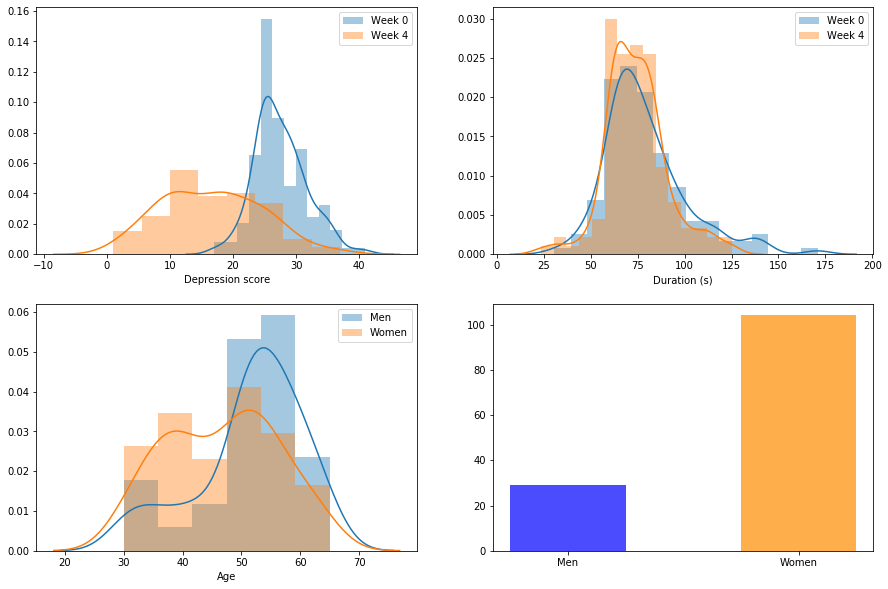

In [79]:
fig, ax = plt.subplots(2, 2, figsize=(15,10), sharex=False, sharey=False)
sns.distplot(meta_df['M_1'], ax=ax[0,0], label='Week 0')
sns.distplot(meta_df['M_4'], ax=ax[0,0], label='Week 4')
ax[0,0].set_xlabel('Depression score')
ax[0,0].legend()

sns.distplot(durs_bef['duration_s'], ax=ax[0,1], label='Week 0')
sns.distplot(durs_aft['duration_s'], ax=ax[0,1], label='Week 4')
ax[0,1].set_xlabel('Duration (s)')
ax[0,1].legend()

sns.distplot(meta_df[meta_df['SEX']==1]['AGE'], ax=ax[1,0], label='Men')
sns.distplot(meta_df[meta_df['SEX']==0]['AGE'], ax=ax[1,0], label='Women')
ax[1,0].set_xlabel('Age')
ax[1,0].legend()

women = meta_df[meta_df['SEX'] == 0]['SEX'].count()
men = meta_df[meta_df['SEX'] == 1]['SEX'].count()
ax[1,1].bar(('Men', 'Women'), (men, women), 0.5, color=('blue', 'darkorange'), alpha=0.7)

plt.show()

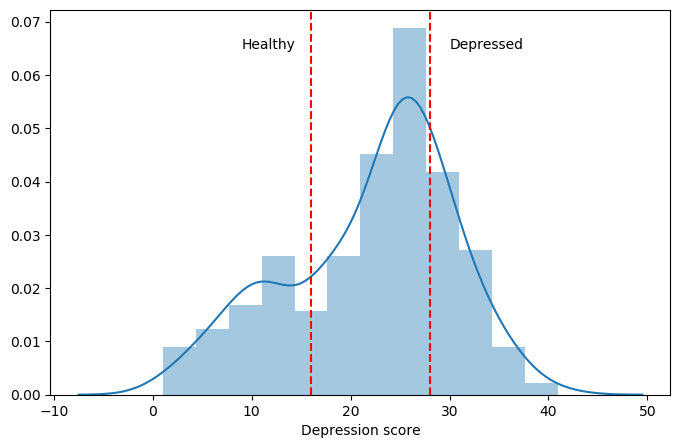

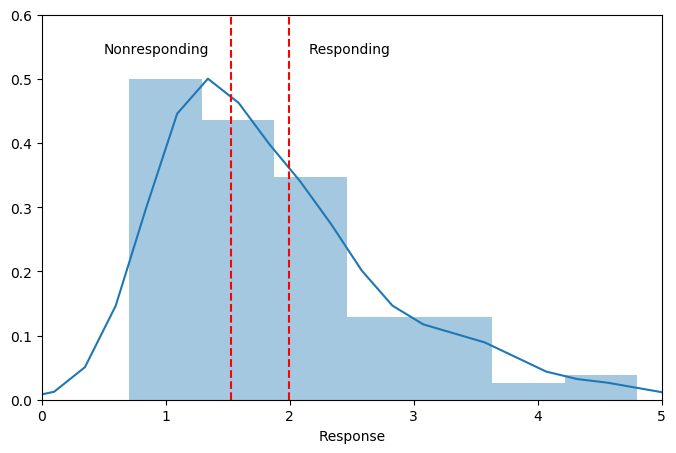

In [80]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

fs = (8,5)
plt.figure(figsize=fs)
sns.distplot(meta_df['M_1'].append(meta_df['M_4']), label='')
plt.axvline(x=16, color='red', linestyle='--')
plt.axvline(x=28, color='red', linestyle='--')
plt.xlabel('Depression score')
plt.annotate('Depressed', xy=(50, 0.065), xytext=(30, 0.065),
            arrowprops=None)
plt.annotate('Healthy', xy=(50, 0.065), xytext=(9, 0.065),
            arrowprops=None)
plt.show()

plt.figure(figsize=fs)
sns.distplot(metapkl.loc[(slice(None), 'a'), 'change'], label='')
plt.axvline(x=metapkl.loc[(slice(None), 'a'), :].quantile(0.42)['change'], color='red', linestyle='--')
plt.axvline(x=metapkl.loc[(slice(None), 'a'), :].quantile(0.56)['change'], color='red', linestyle='--')
plt.xlabel('Response')
plt.xlim([0,5])
plt.ylim([0,0.6])
plt.annotate('Nonresponding', xy=(1, 0.55), xytext=(0.5, 0.54),
            arrowprops=None)
plt.annotate('Responding', xy=(2, 0.55), xytext=(2.15, 0.54),
            arrowprops=None)
plt.show()

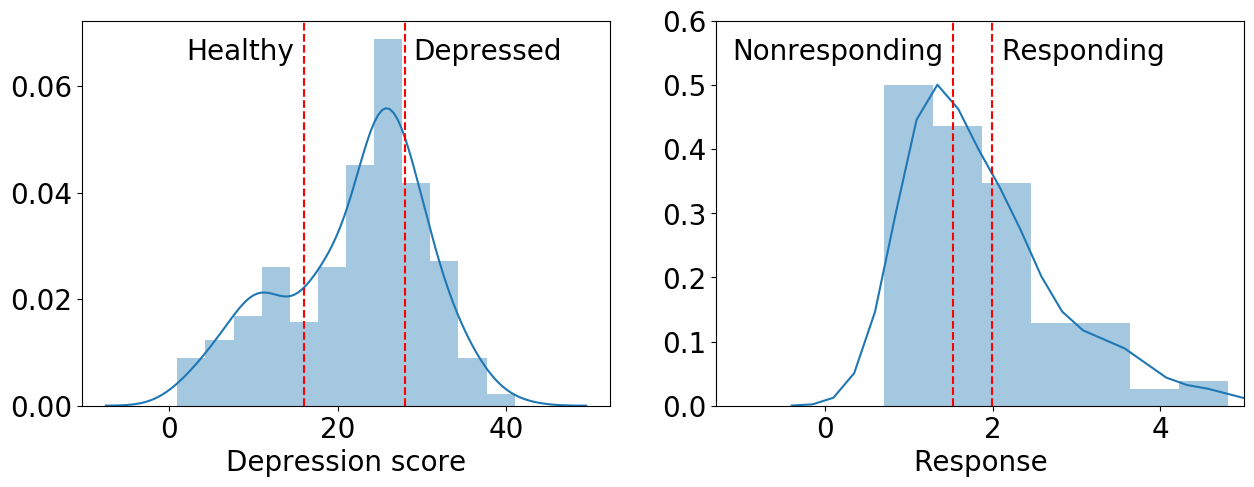

In [81]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

font = {# 'family' : 'normal',
        # 'weight' : 'bold',
        'size'   : 20}

plt.rc('font', **font)


fig, ax = plt.subplots(1, 2, figsize=(15,5), sharex=False, sharey=False)
sns.distplot(meta_df['M_1'].append(meta_df['M_4']), ax=ax[0], label='')
ax[0].axvline(x=16, color='red', linestyle='--')
ax[0].axvline(x=28, color='red', linestyle='--')
ax[0].set_xlabel('Depression score')
# ax[0].set_xlim([0,40])
ax[0].annotate('Depressed', xy=(50, 0.065), xytext=(29, 0.065),
            arrowprops=None)
ax[0].annotate('Healthy', xy=(50, 0.065), xytext=(2, 0.065),
            arrowprops=None)

sns.distplot(metapkl.loc[(slice(None), 'a'), 'change'], ax=ax[1], label='')
ax[1].axvline(x=metapkl.loc[(slice(None), 'a'), :].quantile(0.42)['change'], color='red', linestyle='--')
ax[1].axvline(x=metapkl.loc[(slice(None), 'a'), :].quantile(0.56)['change'], color='red', linestyle='--')
ax[1].set_xlabel('Response')
ax[1].set_xlim([-1.3,5])
ax[1].set_ylim([0,0.6])
ax[1].annotate('Nonresponding', xy=(1, 0.55), xytext=(-1.1, 0.54),
            arrowprops=None)
ax[1].annotate('Responding', xy=(2, 0.55), xytext=(2.1, 0.54),
            arrowprops=None)

plt.show()

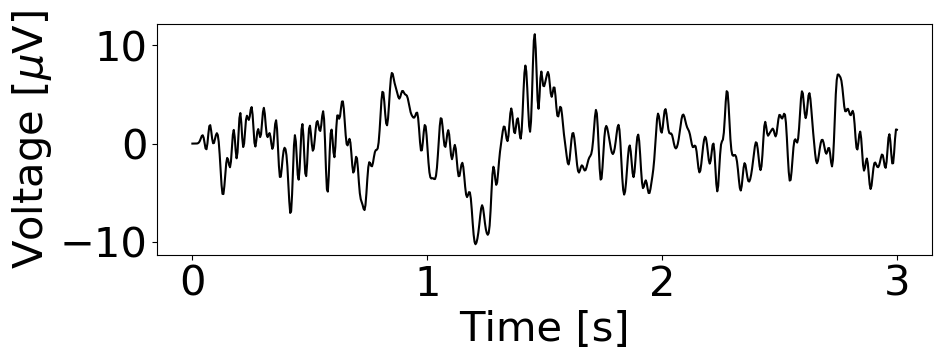

In [85]:
plt.figure(figsize=(10,3))
line = plt.plot(np.linspace(0, 3, 750), data.get_data()[0][:750], color='black')
fontsize=30
plt.xlabel('Time [s]', fontsize=fontsize)
plt.ylabel(r'Voltage [$\mu$V]', fontsize=fontsize)
plt.tick_params(axis='x', labelsize=fontsize)
plt.tick_params(axis='y', labelsize=fontsize)
plt.show()

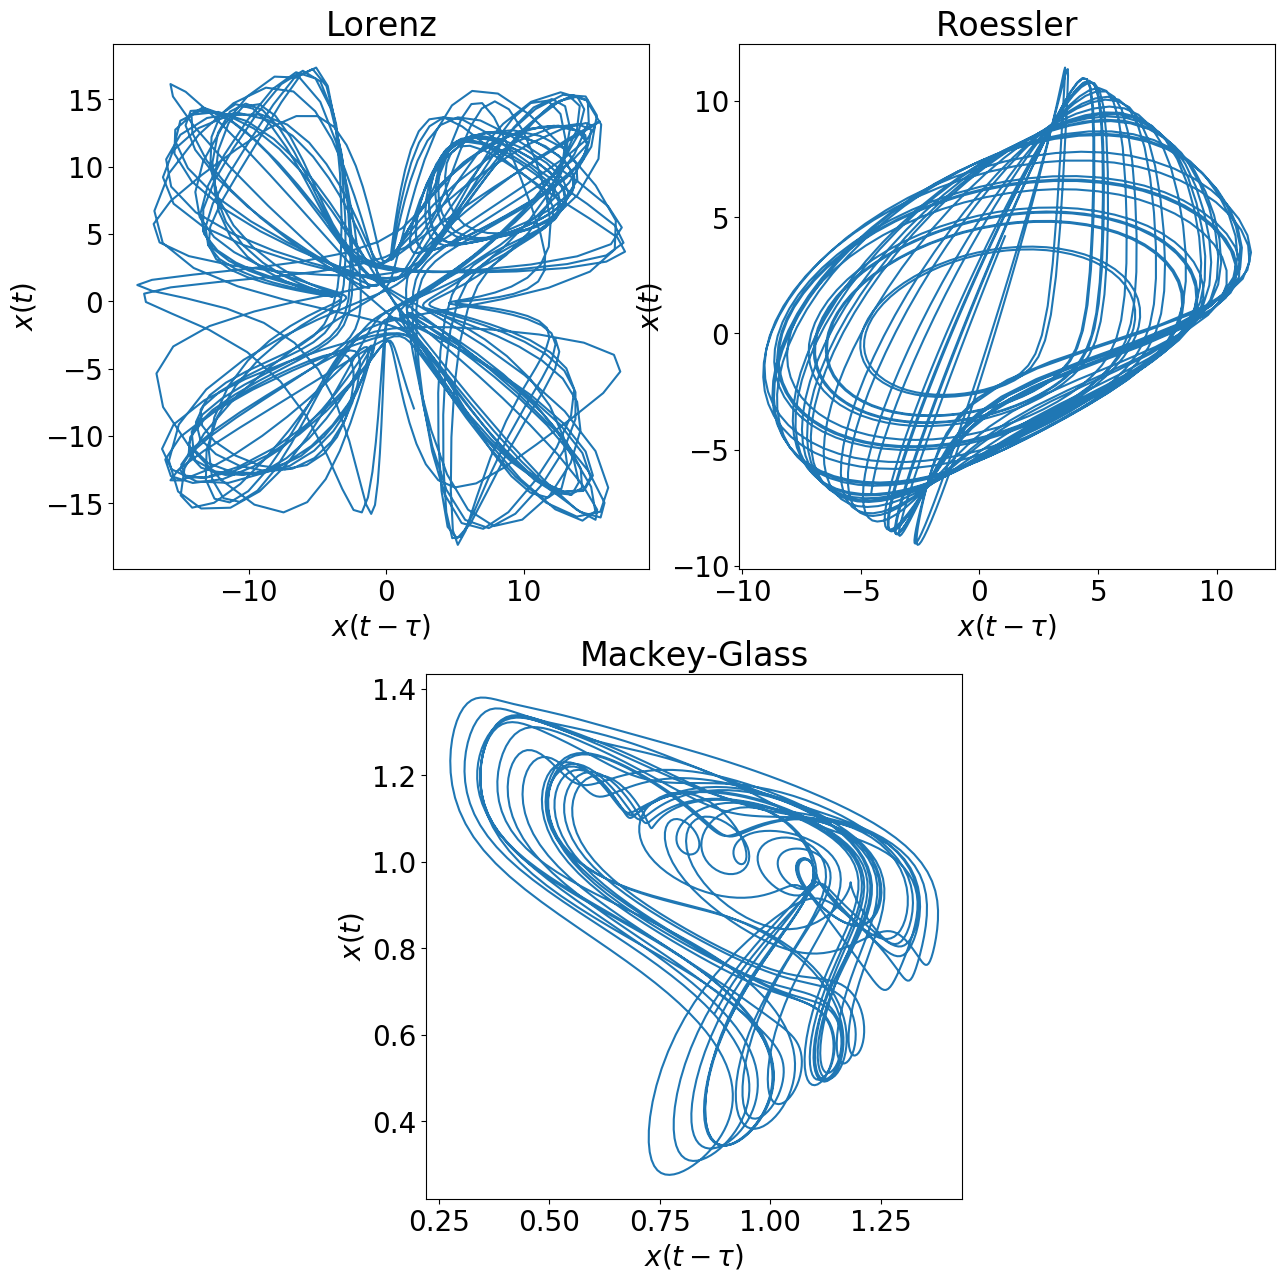

In [86]:
from lib.nolitsa.nolitsa import data

def plotx(x, ax, title=''):
    ax.set_title(title)
    ax.plot(x[50:], x[:-50])
    ax.set_xlabel(r'$x(t - \tau)$')
    ax.set_ylabel(r'$x(t)$')
    

# fig, ax = plt.subplots(2, 2, figsize=(10,10))

import matplotlib.gridspec as gridspec
plt.figure(figsize=(15,15))
gs = gridspec.GridSpec(2, 4, hspace=0.2, wspace=0.4)
ax1 = plt.subplot(gs[0, 0:2])
ax2 = plt.subplot(gs[0,2:])
ax3 = plt.subplot(gs[1,1:3])
fig = plt.gcf()
# gs.tight_layout(fig)

x = data.lorenz(length=2000)[1][:, 0]
plotx(x, ax1, 'Lorenz')

x = data.roessler(length=2000)[1][:, 0]
plotx(x, ax2, 'Roessler')

x = data.mackey_glass(length=3000)
plotx(x, ax3, 'Mackey-Glass')

# x = data.ikeda(length=500)[:, 0]
# plotx(x, ax[1,1], 'Ikeda')

# plt.tight_layout()
plt.show()